In [1]:
import math
import datetime
import pandas as pd
import pandas_datareader as web
import numpy as np
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf

In [2]:
yf.pdr_override()
df = pdr.get_data_yahoo('NVDA', start='2016-01-01', end='2024-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,8.072500,8.145000,8.010000,8.092500,7.899904,35807600
2016-01-05,8.245000,8.360000,8.125000,8.222500,8.026810,49027200
2016-01-06,8.087500,8.125000,7.790000,7.882500,7.694905,44934400
2016-01-07,7.685000,7.737500,7.470000,7.570000,7.389842,64530400
2016-01-08,7.667500,7.675000,7.392500,7.407500,7.231209,39847200
...,...,...,...,...,...,...
2023-12-22,491.950012,493.829987,484.670013,488.299988,488.277069,25213900
2023-12-26,489.679993,496.000000,489.600006,492.790009,492.766907,24420000
2023-12-27,495.109985,496.799988,490.850006,494.170013,494.146820,23364800


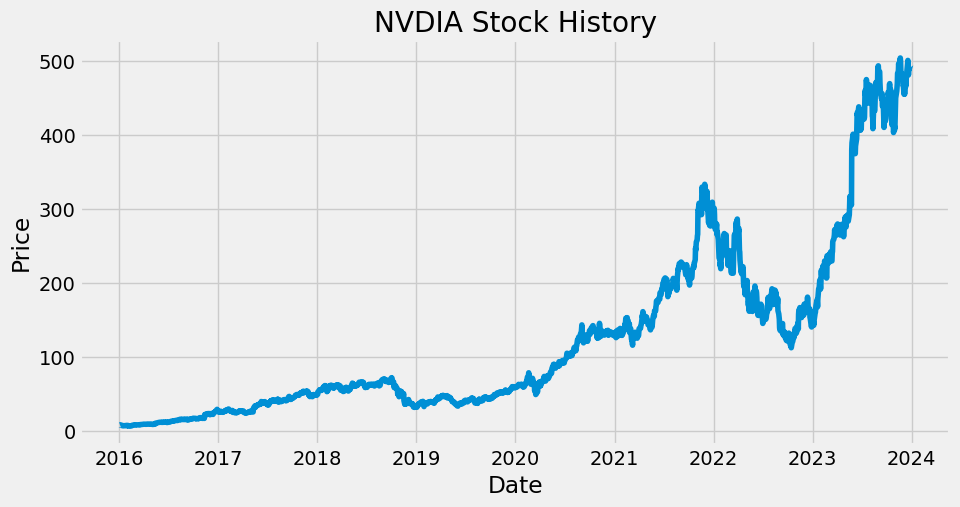

In [4]:
plt.figure(figsize=(10,5))
plt.title('NVDIA Stock History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df['Adj Close'])

In [5]:
data = df.filter(['Adj Close'])
dataset = data.values # convert to numpy array
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1610

In [6]:
# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [7]:
len(scaled_data)

2012

In [8]:
train_data = scaled_data[0:training_data_len]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([3.50486604e-03, 3.75976428e-03, 3.09311067e-03, 2.48037033e-03,
       2.16174563e-03, 2.18625375e-03, 2.43134835e-03, 1.98037462e-03,
       1.69116177e-03, 9.26463232e-04, 1.03430413e-03, 1.10783232e-03,
       1.26469712e-03, 1.58331895e-03, 1.56861446e-03, 1.70586625e-03,
       1.53920261e-03, 1.38724442e-03, 1.99507815e-03, 1.99998093e-03,
       1.39214336e-03, 1.46077069e-03, 1.46567347e-03, 5.93135951e-04,
       0.00000000e+00, 1.32351890e-04, 1.02939082e-04, 3.92145236e-05,
       2.49999292e-04, 8.67637616e-04, 1.19606883e-03, 2.36272485e-03,
       2.55880225e-03, 3.08820694e-03, 3.12742147e-03, 3.23526428e-03,
       3.26957699e-03, 3.16663599e-03, 3.06578099e-03, 3.74963501e-03,
       3.84310663e-03, 3.70043105e-03, 3.65123188e-03, 3.54791831e-03,
       3.25765383e-03, 3.24781189e-03, 3.22321279e-03, 3.48888199e-03,
       3.52823922e-03, 3.44952572e-03, 3.92182301e-03, 3.78406839e-03,
       4.27112764e-03, 4.32032394e-03, 4.29080769e-03, 4.57615120e-03,
     

In [9]:
train_data

array([[0.00350487],
       [0.00375976],
       [0.00309311],
       ...,
       [0.32252729],
       [0.3266196 ],
       [0.31169461]])

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1550, 60, 1)

In [12]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\hamza\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.fit(x_train,y_train, batch_size= 1, epochs=1)

1550/1550 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - loss: 0.0019


In [15]:
# Creating testing dataset
# Creating new array containg scaled values from last 2578 till the end
test_data = scaled_data[training_data_len - 60: ]
x_test = []
y_test = dataset[training_data_len:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [16]:
# convert data to numpy array
x_test = np.array(x_test)

In [17]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [18]:
# Get model prediction price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [19]:
# Get RMSE 
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

8.564198773891771

C:\Users\hamza\AppData\Local\Temp\ipykernel_16952\3728504260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


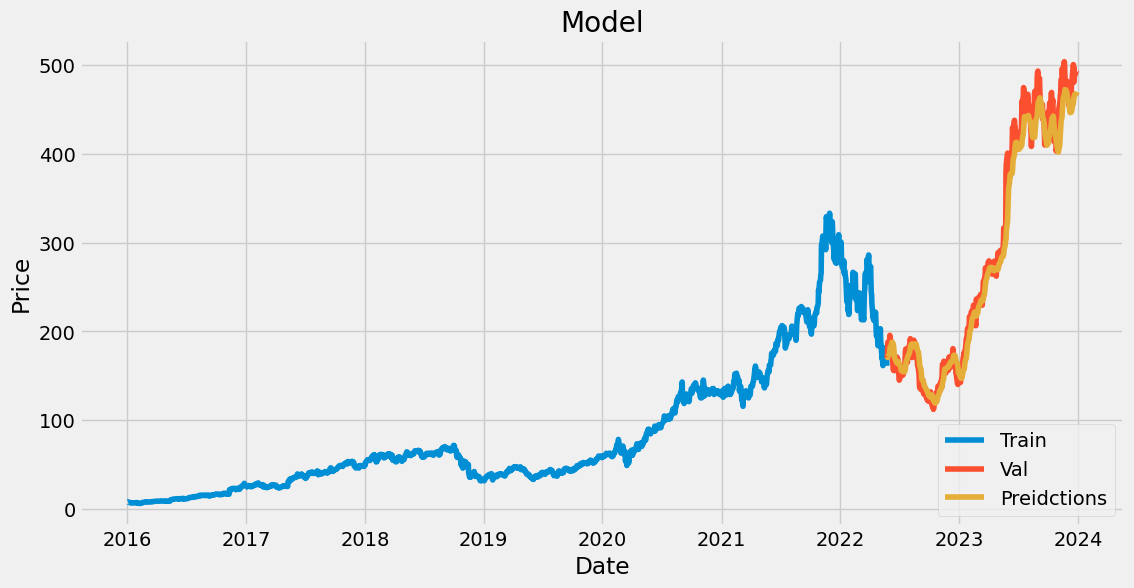

In [20]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize Data
plt.figure(figsize=(12,6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Preidctions'], loc= 'lower right')

In [21]:
# show valid and predicted prices
valid

,Adj Close,Predictions
Date,,
2022-05-25,169.537155,171.517487
2022-05-26,178.286133,170.705414
2022-05-27,187.874100,171.339951
2022-05-31,186.485840,173.692108
2022-06-01,182.970276,176.460114
...,...,...
2023-12-22,488.277069,467.019897
2023-12-26,492.766907,467.497162
2023-12-27,494.146820,468.213043


In [27]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(valid['Adj Close'], valid['Predictions']))
print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 18.724746495154818
